In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('./Mall_Customer.csv', index_col ='CustomerID')

In [9]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [11]:
df.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [12]:
df.isnull()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
...,...,...,...,...
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [17]:
X = df.iloc [:,[2,3]].values

In [16]:
print(X)

            Annual_Income_(k$)  Spending_Score
CustomerID                                    
1                           15              39
2                           15              81
3                           16               6
4                           16              77
5                           17              40
...                        ...             ...
196                        120              79
197                        126              28
198                        126              74
199                        137              18
200                        137              83

[200 rows x 2 columns]


In [13]:
df.isnull().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [18]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

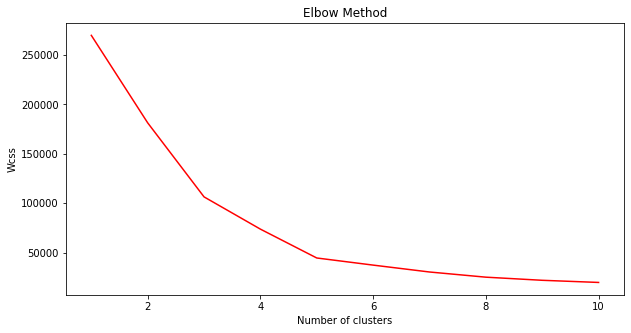

In [25]:
plt.figure(figsize = (10,5))
sns.lineplot(range(1,11), wcss, color = 'red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()

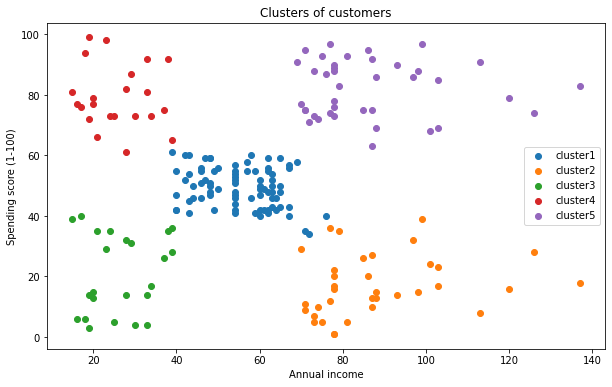

In [31]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X)
plt.figure(figsize = (10,6))
for i in range(5):
    plt.scatter(X[y_pred == i,0], X[y_pred ==i,1],label = 'cluster'+str(i+1))
    plt.legend()
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual income')
plt.ylabel('Spending score (1-100)')
plt.show()

In [28]:
print(X[y_pred ==2, 1])

[39  6 40  6  3 14 15 13 35 29 35  5 14 32 31  4  4 14 17 26 35 36 28]
